In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#Check data is balanced or not.
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X =  df.drop(['target'],axis=1)
Y = df['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2) 

In [8]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [10]:
#Creating Models
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)

rfc = RandomForestClassifier(n_estimators=120)
rfc.fit(x_train,y_train)

lgr = LogisticRegression()
lgr.fit(x_train,y_train)

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred_dtc = dtc.predict(x_test)
pred_rfc = rfc.predict(x_test)
pred_lgr = lgr.predict(x_test)
pred_gnb = gnb.predict(x_test)


acc_dtc = accuracy_score(y_test,pred_dtc)
ps_dtc = precision_score(y_test,pred_dtc)
rs_dtc = recall_score(y_test,pred_dtc)
f1_dtc = f1_score(y_test,pred_dtc)


acc_rfc = accuracy_score(y_test,pred_rfc)
ps_rfc = precision_score(y_test,pred_rfc)
rs_rfc = recall_score(y_test,pred_rfc)
f1_rfc = f1_score(y_test,pred_rfc)


acc_lgr = accuracy_score(y_test,pred_lgr)
ps_lgr = precision_score(y_test,pred_lgr)
rs_lgr = recall_score(y_test,pred_lgr)
f1_lgr = f1_score(y_test,pred_lgr)


acc_gnb = accuracy_score(y_test,pred_gnb)
ps_gnb = precision_score(y_test,pred_gnb)
rs_gnb = recall_score(y_test,pred_gnb)
f1_gnb = f1_score(y_test,pred_gnb)

Name_list = ['Decision Tree','Random Forest','Losgistic Regression','Gaussian NB']

accuracy_list = [acc_dtc,acc_rfc,acc_lgr,acc_gnb]

precision_list = [ps_dtc,ps_rfc,ps_lgr,ps_gnb]

recall_list = [rs_dtc,rs_rfc,rs_lgr,rs_gnb]

f1_list = [f1_dtc,f1_rfc,f1_lgr,f1_gnb]


In [12]:
results = pd.DataFrame({'Names':Name_list,'Accuracy':accuracy_list,'Precision Score':precision_list,'Recall Score':recall_list,'f1-Score':f1_list})
results

,Names,Accuracy,Precision Score,Recall Score,f1-Score
0,Decision Tree,0.819672,0.769231,0.93750,0.845070
1,Random Forest,0.852459,0.828571,0.90625,0.865672
2,Losgistic Regression,0.852459,0.794872,0.96875,0.873239
3,Gaussian NB,0.786885,0.743590,0.90625,0.816901


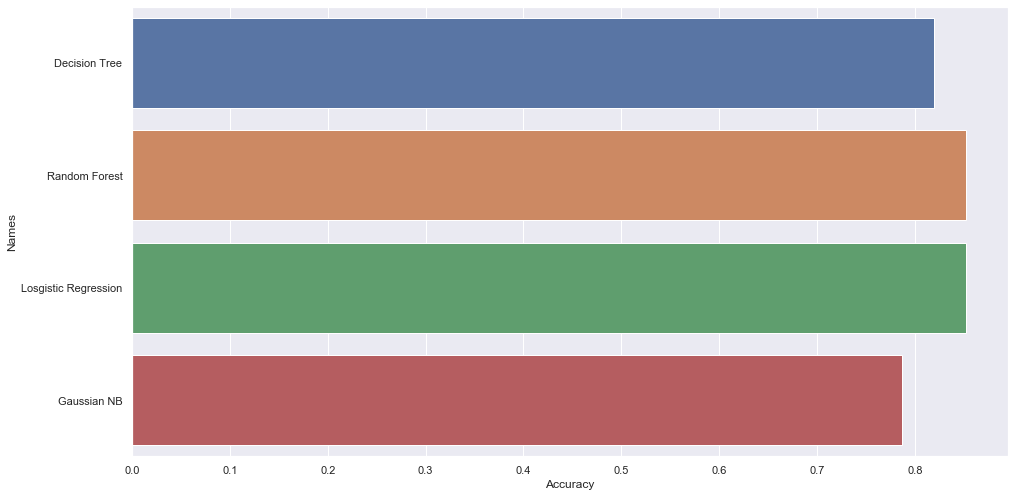

In [25]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x=results['Accuracy'],y=results['Names'])

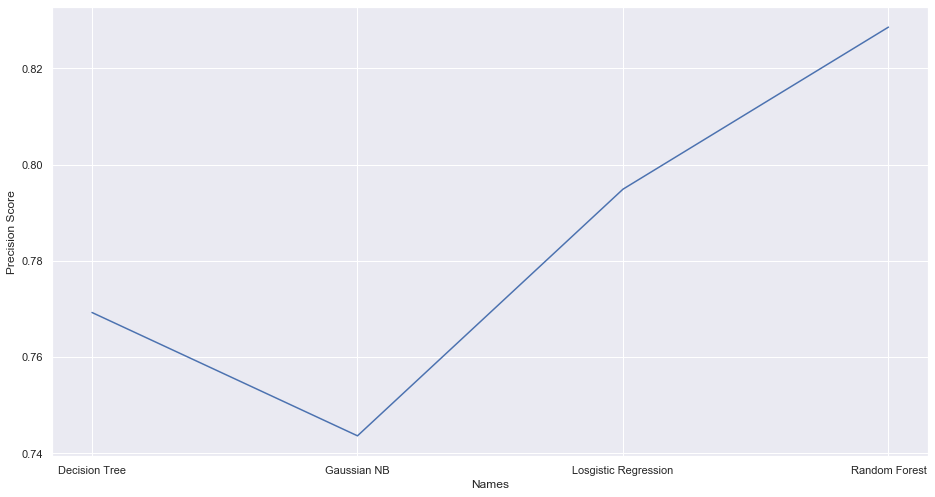

In [26]:
sns.lineplot(x=results['Names'],y=results['Precision Score'])

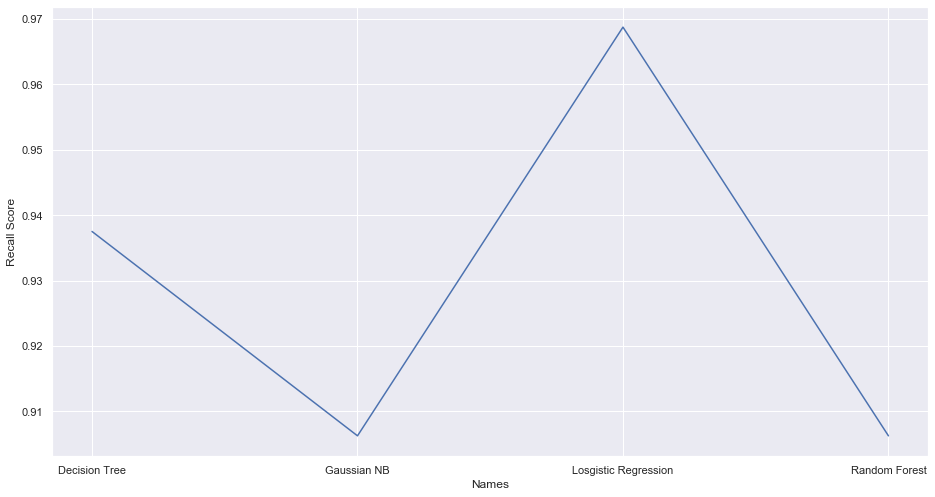

In [27]:
sns.lineplot(x=results['Names'],y=results['Recall Score'])

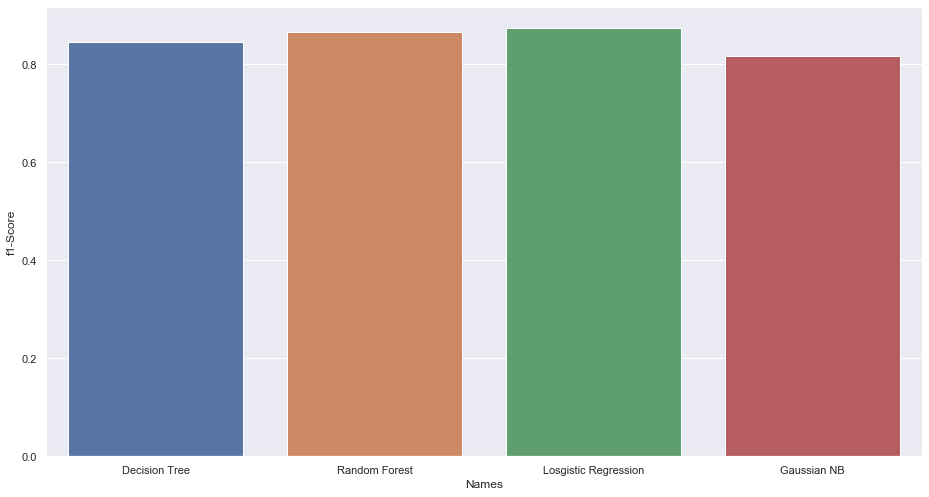

In [28]:

sns.barplot(x=results['Names'],y=results['f1-Score'])